# Sentiment Analysis Bidirectional LSTM with imdb dataset

![](https://camo.qiitausercontent.com/bba5c5a2058fb00325c28ee4710e3ed647bd5120/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3234303830312f32653132343162372d626262332d383733622d643033352d6231646439303936396164312e706e67)

### Bidirectional LSTMの特徴
- 過去と未来の特定の時間枠における全ての利用可能な入力情報を使用して訓練することができる双方向リカレントニューラルネットワーク（BRNN）
- 正の時間方向を担う部分（順方向状態）と負の時間方向を担う部分（逆方向状態）で、通常のRNNの状態ニューロンを分割する
- 逆方向のLSTMが文脈理解を助ける働きを持つ  
  
  by Mike Schuster and Kuldip K. Paliwal, Bidirectional Recurrent Neural Networks, 1997

In [1]:
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
#  指定された数値だけ上位の頻出語が対象となります．指定された数値より下位の頻出語はシーケンスデータにおいてoov_charの値で表現する．
max_features = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
x_train.shape

(25000,)

In [13]:
np.unique(y_train)

array([0, 1])

In [6]:
len(x_train[0])

218

In [7]:
len(x_train[1])

189

In [12]:
len(np.unique(x_train))

24902

In [26]:
MAX_LEN = 120
BATCH_SIZE = 32
EPOCHS = 5

## 2. Padding

- num_samples シーケンスから構成されるリストを(num_samples, num_timesteps)の2次元のNumpy 配列に変換します．
- num_timestepsはmaxlen引数が与えられればmaxlenに，与えられなければ最大のシーケンス長になります．
- num_timestepsより短いシーケンスは，valueでパディングされます．
- num_timestepsより長いシーケンスは，指定された長さに切り詰められます． 
- パディングと切り詰めの位置はそれぞれpaddingとtruncatingによって決められます．
- x: shapeが(len(sequences), maxlen)のNumpy配列．

In [21]:
#  num_samples = data = データ数
print(x_train.shape, x_test.shape)

(25000, 120) (25000, 120)


In [19]:
from keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=MAX_LEN)
x_test = pad_sequences(x_test, maxlen=MAX_LEN)

In [20]:
# 2D array!
print(x_train.shape, x_test.shape)

(25000, 120) (25000, 120)


## 3. Modeling

In [28]:
# id -> embedding -> LSTM1 -> LSTM2 -> Dense
model = Sequential()
model.add(Embedding(output_dim=128, input_dim=max_features, input_length=MAX_LEN))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer="adam", 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 128)          2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,658,945
Trainable params: 2,658,945
Non-trainable params: 0
_________________________________________________________________


In [32]:
y_train.shape

(25000,)

In [33]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [34]:
y_train.shape

(25000,)

In [35]:
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=[x_test, y_test])

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 235s 9ms/step - loss: 0.4069 - acc: 0.8124 - val_loss: 0.3312 - val_acc: 0.8562
Epoch 2/5
25000/25000 [==============================] - 208s 8ms/step - loss: 0.2198 - acc: 0.9168 - val_loss: 0.3505 - val_acc: 0.8557
Epoch 3/5
25000/25000 [==============================] - 260s 10ms/step - loss: 0.1332 - acc: 0.9519 - val_loss: 0.3878 - val_acc: 0.8478
Epoch 4/5
25000/25000 [==============================] - 243s 10ms/step - loss: 0.0808 - acc: 0.9717 - val_loss: 0.5049 - val_acc: 0.8460
Epoch 5/5
25000/25000 [==============================] - 228s 9ms/step - loss: 0.0473 - acc: 0.9850 - val_loss: 0.5940 - val_acc: 0.8404


In [44]:
history.history

{'acc': [0.8124, 0.91676, 0.95188, 0.97172, 0.985],
 'loss': [0.40686583689689637,
  0.21981271396160126,
  0.1331834359383583,
  0.0807769471281767,
  0.047306158503443003],
 'val_acc': [0.8562, 0.85568, 0.84776, 0.84596, 0.84036],
 'val_loss': [0.33121045380592345,
  0.35048677305698395,
  0.38779080388069154,
  0.5048944901180268,
  0.5939867506408691]}

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

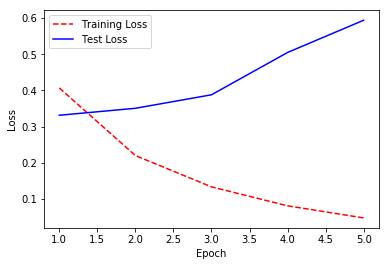

In [38]:
# Visualize loss history
training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

Over Fitting!!!